# 2.2 벡터와 행렬의 연산

In [3]:
import numpy as np
import matplotlib.pylab as plt

## 벡터/행렬의 덧셈과 뺄셈

### 벡터

In [4]:
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])
x + y

array([10, 12, 14, 16, 18])

In [5]:
x - y

array([10, 10, 10, 10, 10])

### 행렬

In [16]:
X = np.array([[5, 6], [7, 8]])
Y = np.array([[10, 20], [30, 40]])
Z = np.array([[1, 2], [3, 4]])
X

array([[5, 6],
       [7, 8]])

In [9]:
X + Y

array([[15, 26],
       [37, 48]])

In [15]:
X / Z

array([[5.        , 3.        ],
       [2.33333333, 2.        ]])

## 스칼라와 벡터/행렬의 곱셈

In [17]:
2 * X

array([[10, 12],
       [14, 16]])

## 브로드캐스팅(broadcasting)

In [20]:
X - 1

array([[4, 5],
       [6, 7]])

In [21]:
X - X.mean()

array([[-1.5, -0.5],
       [ 0.5,  1.5]])

## 선형조합(linear combination)

벡터/행렬에 다음처럼 스칼라값을 곱한 후 더하거나 뺀 것. 크기는 변하지 않는다.

In [23]:
2 * X + 3 * Y

array([[ 40,  72],
       [104, 136]])

## 내적(inner product)

두 벡터의 곱셈. 닷 프로덕트(dot product). 기호: <  x,y  >

In [26]:
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])
x

array([[1],
       [2],
       [3]])

In [27]:
x.T @ y

array([[32]])

In [28]:
np.dot(x.T, y)

array([[32]])

넘파이에서는 1차원 배열끼리도 내적을 계산한다. 
이때는 넘파이가 앞의 벡터는 행 벡터이고 뒤의 벡터는 열 벡터라고 가정한다.

In [29]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

x @ y  # 또는 np.dot(x, y)

32

## 가중합(weighted sum)

각각의 수에 어떤 가중치 값을 곱한 후, 이 곱셈 결과들을 다시 합한 것.

## 연습 문제 2.2.1

A, B, C 세 회사의 주식은 각각 100만원, 80만원, 50만원이다. 이 주식을 각각 3주, 4주, 5주를 매수할 때 필요한 금액을 구하고자 한다.

(1) 주식의 가격과 수량을 각각  p  벡터,  n  벡터로 표시하고 넘파이로 코딩한다.

In [30]:
p = np.array([100, 80, 50])
n = np.array([3, 4, 5])

(2) 주식을 매수할 때 필요한 금액을 곱셈으로 표시하고 넘파이 연산으로 그 값을 계산한다.

In [33]:
p @ n # 또는 np.dot(p, n)

870

## 가중평균(weighted average)

가중합의 가중치값을 전체 가중치값의 합으로 나눈 것.

In [39]:
(p @ n) / n.sum() # 주당 평균 매수가

72.5

## 유사도(similarity)

두 벡터가 닮은 정도를 정량적으로 나타낸 값으로 두 벡터가 비슷한 경우에는 유사도가 커지고 비슷하지 앟은 경우에는 유사도가 작아진다. 내적을 이용하면 **코사인 유사도**(cosine similarity)라는 유사도를 계산할 수 있다.

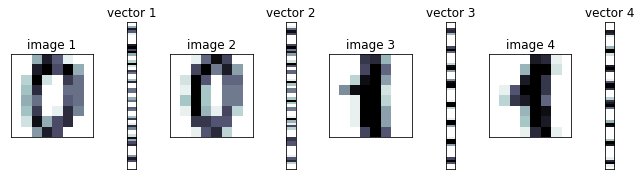

In [96]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])

for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))

plt.tight_layout()
plt.show()

"0" 이미지와 "0" 이미지, 또는 "1" 이미지와 "1" 이미지의 내적값은 다음과 같다. (상대적으로 큰 편)

In [97]:
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

상대적으로 "0" 이미지와 "1" 이미지, 또는 "1" 이미지와 "0" 이미지의 내적값은 작다.

In [98]:
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

### 연습 문제 2.2.3

In [99]:
from sklearn.datasets import load_digits
X = load_digits().data

(1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

In [100]:
X[0] @ X[9]

2807.0

(2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까? (힌트 : 이 문제는 뒤에서 배울 행렬과 행렬의 곱셈을 이용한다.)

In [101]:
print(X.shape[0])

1797


In [106]:
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        # print(X[i] @ X[j]) # 부하 걸리니까 굳이 실행하진 말자.

3070.0
1866.0
1866.0
4209.0


## 선형회귀 모형(linear regression model)

독립변수  $x$ 에서 종속변수  $y$ 를 예측하는 방법의 하나. **독립변수 벡터 $x$**와 **가중치 벡터  $w$**와의 **가중합**으로  $y$ 에 대한 예측값  $\hat{y}$ 를 계산하는 수식.

간단히 두 벡터의 내적으로 표현 가능하다.

\begin{align}
\hat{y} = w^Tx
\end{align}

## 제곱합(sum of squares)

$$
x^Tx = \sum_{i=1}^{N}x_i^2
$$

## 행렬과 행렬의 곱셈

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

In [5]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [7]:
A @ B

array([[22, 28],
       [49, 64]])

### 연습 문제 2.2.4

In [8]:
B @ A

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [9]:
A = np.array([1, 2, 3])
B = np.array([[4, 7], [5, 8], [6, 9]])

In [12]:
A @ B

array([32, 50])

#### (4)

In [14]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [15]:
A @ B

array([[19, 22],
       [43, 50]])

In [16]:
B @ A

array([[23, 34],
       [31, 46]])

#### (5)

In [17]:
A = np.array([[1, 2], [3, 4], [5, 6]])

In [18]:
A @ A.T

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

In [19]:
A.T @ A

array([[35, 44],
       [44, 56]])

## 교환 법칙과 분배 법칙

In [20]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

In [23]:
A @ B != B @ A

array([[ True,  True],
       [ True,  True]])

In [24]:
A @ (B + C) == A @ B + A @ C

array([[ True,  True],
       [ True,  True]])

In [25]:
(A + B) @ C == A @ C + B @ C

array([[ True,  True],
       [ True,  True]])

In [26]:
# 전치 연산(덧셈/뺄셈): 분배 법칙 성립
(A + B).T == A.T + B.T

array([[ True,  True],
       [ True,  True]])

In [28]:
# 전치 연산(곱셈): 곱셈의 순서가 바뀌며 분배 법칙 성립
(A @ B).T == B.T @ A.T

array([[ True,  True],
       [ True,  True]])

### 연습 문제 2.2.5

#### (1)

$$ \textbf{1}_Nx = 
\quad
\begin{bmatrix} 
   x^T \\
   x^T \\
   ⋮ \\
   x^T
\end{bmatrix}
\quad $$

In [141]:
N = np.random.randint(5, 10) # 5 이상 10 미만 정수
N

6

In [166]:
ones = np.ones(N).reshape(N, 1)
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [186]:
x = np.array([])
for i in range(N):
    x = np.append(x, np.array([np.random.randint(10)]))
x = x.reshape(N, 1)
x

array([[3.],
       [5.],
       [4.],
       [2.],
       [2.],
       [2.]])

In [187]:
ones @ x.T

array([[3., 5., 4., 2., 2., 2.],
       [3., 5., 4., 2., 2., 2.],
       [3., 5., 4., 2., 2., 2.],
       [3., 5., 4., 2., 2., 2.],
       [3., 5., 4., 2., 2., 2.],
       [3., 5., 4., 2., 2., 2.]])

#### (2)

In [139]:
X = np.array([[0, 1, 2],
             [3, 4, 5]])

N = X.shape[0]
ones = np.ones(N)

(1/N) * (X.T @ ones)

array([1.5, 2.5, 3.5])

#### (3)

In [428]:
N = np.random.randint(2, 6)
M = 3

In [429]:
x1 = np.array([])
for i in range(N):
    x1 = np.append(x1, np.array([np.random.randint(10)]))
x1 = x1.reshape(N, 1)
x1

array([[2.],
       [9.],
       [9.],
       [6.],
       [0.]])

In [430]:
x2 = np.array([])
for i in range(N):
    x2 = np.append(x2, np.array([np.random.randint(10)]))
x2 = x2.reshape(N, 1)
x2

array([[0.],
       [4.],
       [4.],
       [1.],
       [5.]])

In [431]:
x3 = np.array([])
for i in range(N):
    x3 = np.append(x3, np.array([np.random.randint(10)]))
x3 = x3.reshape(N, 1)
x3

array([[5.],
       [8.],
       [3.],
       [8.],
       [7.]])

In [432]:
x_bar = np.array([])

x_bar = np.array([x1.mean(), x2.mean(), x3.mean()])
x_bar

array([5.2, 2.8, 6.2])

In [433]:
X = np.array([])

X = np.append(X, x1)
X = np.append(X, x2)
X = np.append(X, x3)
X = X.reshape(M, N).T
X

array([[2., 0., 5.],
       [9., 4., 8.],
       [9., 4., 3.],
       [6., 1., 8.],
       [0., 5., 7.]])

In [434]:
X_bar = np.array([])
for i in range(N):
    X_bar = np.append(X_bar, x_bar)
X_bar = X_bar.reshape(N, M)
X_bar

array([[5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2]])

In [435]:
ones_N = np.ones(N).reshape(N, 1)

(1/N) * ones_N @ ones_N.T @ X

array([[5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2],
       [5.2, 2.8, 6.2]])

#### (4)

In [440]:
from sklearn.datasets import load_iris
X_iris = load_iris().data
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [442]:
X_iris.shape[0]

150

In [447]:
iris_count = X_iris.shape[0]
ones_iris = np.ones(iris_count).reshape(iris_count, 1)
ones_iris

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [450]:
X_iris_bar = ones_iris @ ones_iris.T @ X_iris / iris_count
X_iris_bar

array([[5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333,

## 열 벡터의 선형조합

행렬  $X$와 벡터  $w$의 곱. 행렬  $X$를 이루는 열벡터  $c_1, c_2, …, c_M$을 뒤에 곱해지는 벡터  $w$의 각 성분  $w_1, w_2, …, w_M$으로 **선형조합(linear combination)**을 한 결과 벡터와 같다.

### ※ 참고: 모핑(morphing) - 두 이미지 벡터의 선형조합

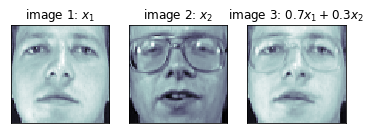

In [454]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

## 여러 개의 벡터에 대한 가중합 동시 계산

$$\hat{y} = Xw$$

$$ \quad
\begin{bmatrix} 
   \hat{y}_1 \\
   \hat{y}_2 \\
   ⋮ \\
   \hat{y}_M
\end{bmatrix}
\quad 
= 
\quad
\begin{bmatrix} 
   x_1^T \\
   x_2^T \\
   ⋮ \\
   x_M^T
\end{bmatrix}
\begin{bmatrix} 
   w_1 \\
   w_2 \\
   ⋮ \\
   w_N
\end{bmatrix}
\quad 
$$

$$
(벡터\ x_1 = [x_{1,1}, x_{1,2}, ⋯, x_{1,M}])
$$

## 잔차

$$ e = y - Xw $$

$$
(잔차\ 벡터\ e = [e_{1}, e_{2}, ⋯, e_{N}])
$$

$$ e_i = y_i - \hat{y}_i = y_i - w^Tx_i $$

## 잔차 제곱합(RSS: Residual Sum of Squares)

$$ \sum_{i=1}^{N}e_i^2 = e^Te = (y - Xw)^T(y - Xw) $$

## 이차형식(Quadratic Form)

$$ x^TAx = \sum_{i=1}^{N}{\sum_{j=1}^{N}a_{i,j}{x_i}{x_j}} $$

In [457]:
x = np.array([1, 2, 3])
A = np.arange(1, 10).reshape(3, 3)
x.T @ A @ x

228

### 연습문제 2.2.12

In [458]:
A.sum()

45

In [459]:
(A + A.T).sum() / 2

45.0

In [461]:
x.T @ A @ x == x.T @ (A + A.T) @ x / 2

True